BSD 3-Clause License

Copyright (c) 2025, Pranjal Choudhury

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are met:

1. Redistributions of source code must retain the above copyright notice, this
   list of conditions and the following disclaimer.

2. Redistributions in binary form must reproduce the above copyright notice,
   this list of conditions and the following disclaimer in the documentation
   and/or other materials provided with the distribution.

3. Neither the name of the copyright holder nor the names of its
   contributors may be used to endorse or promote products derived from
   this software without specific prior written permission.

THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS "AS IS"
AND ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE
IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE ARE
DISCLAIMED. IN NO EVENT SHALL THE COPYRIGHT HOLDER OR CONTRIBUTORS BE LIABLE
FOR ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, OR CONSEQUENTIAL
DAMAGES (INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR
SERVICES; LOSS OF USE, DATA, OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER
CAUSED AND ON ANY THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY,
OR TORT (INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE
OF THIS SOFTWARE, EVEN IF ADVISED OF THE POSSIBILITY OF SUCH DAMAGE.


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


In [2]:
history = pd.read_csv('training parameters_ResNet_v1_100epoch.csv')

In [3]:
history.keys()

Index(['Unnamed: 0', 'acc', 'loss', 'val_acc', 'val_loss'], dtype='object')

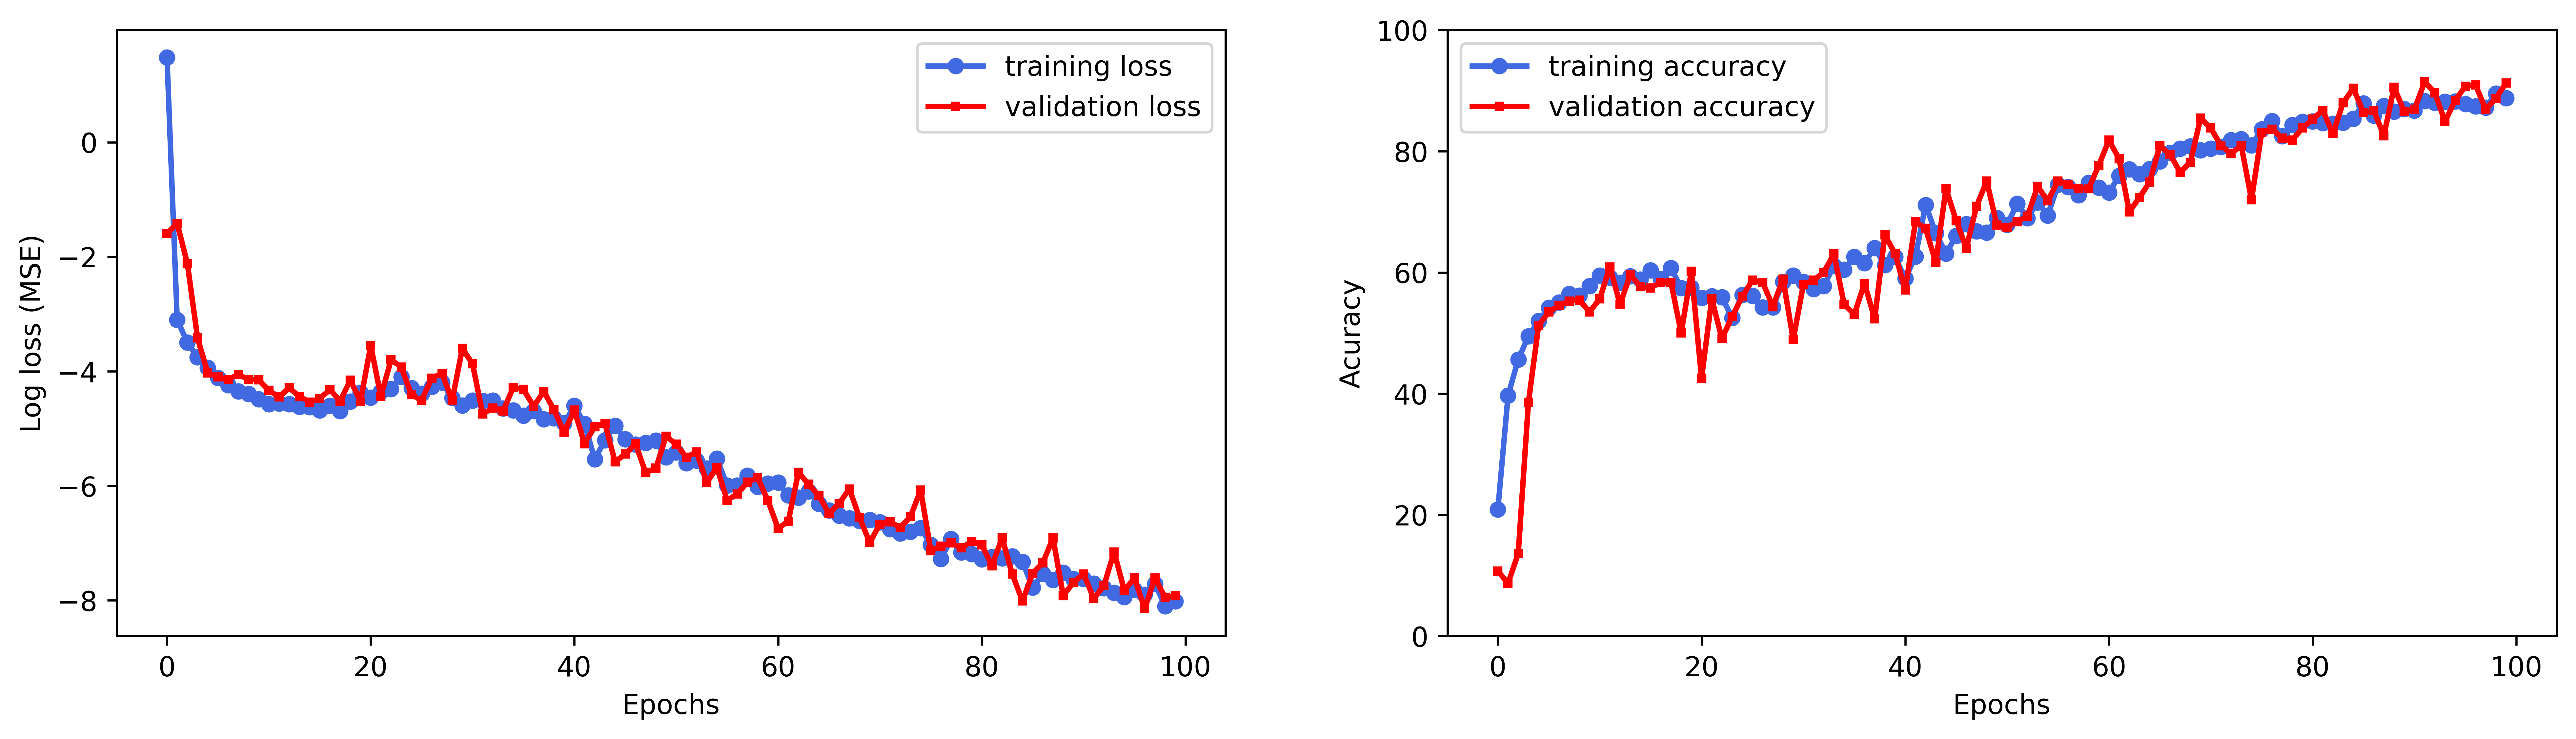

In [4]:
# Create figure
fig, ax = plt.subplots(1,2,figsize=(16, 4), dpi = 600)  # Adjust size to match article requirements

# Plot data
ax[0].plot(np.log(history['loss']), color='royalblue', label='training loss', linewidth=2, marker='o', markersize=5)
ax[0].plot(np.log(history['val_loss']), color='red', label='validation loss', linewidth=2, marker='s', markersize=2.5)

ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Log loss (MSE)")


ax[0].legend()

# Plot data
ax[1].plot(history['acc']*100, color='royalblue', label='training accuracy', linewidth=2, marker='o', markersize=5)
ax[1].plot(history['val_acc']*100, color='red', label='validation accuracy', linewidth=2, marker='s', markersize=2.5)
ax[1].set_ylim(0,100)
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Acuracy")


ax[1].legend()

# Show plot
plt.show()

In [5]:

from zernike_generator import zernikegenerator 


In [6]:
zernike_modes = zernikegenerator(15, 450)

In [7]:
number_of_zernike_modes = 36
aberrations = [zernike_modes[i+3] for i in range(number_of_zernike_modes)] 

In [8]:
target = np.load('datasets/test_z4_z15_0.5.npy')
predicted = np.load('datasets/test_z4_z15_0.5_prediction.npy')

number_of_data = target.shape[0]

In [9]:
predicted.shape

(12, 36)

In [10]:
predicted_12 = np.zeros_like(target)
for i in range(12):
    for j in range(12):
        predicted_12[i,j] = predicted[i,j] 

[Text(0, 0, 'Z4'),
 Text(0, 1, 'Z5'),
 Text(0, 2, 'Z6'),
 Text(0, 3, 'Z7'),
 Text(0, 4, 'Z8'),
 Text(0, 5, 'Z9'),
 Text(0, 6, 'Z10'),
 Text(0, 7, 'Z11'),
 Text(0, 8, 'Z12'),
 Text(0, 9, 'Z13'),
 Text(0, 10, 'Z14'),
 Text(0, 11, 'Z15')]

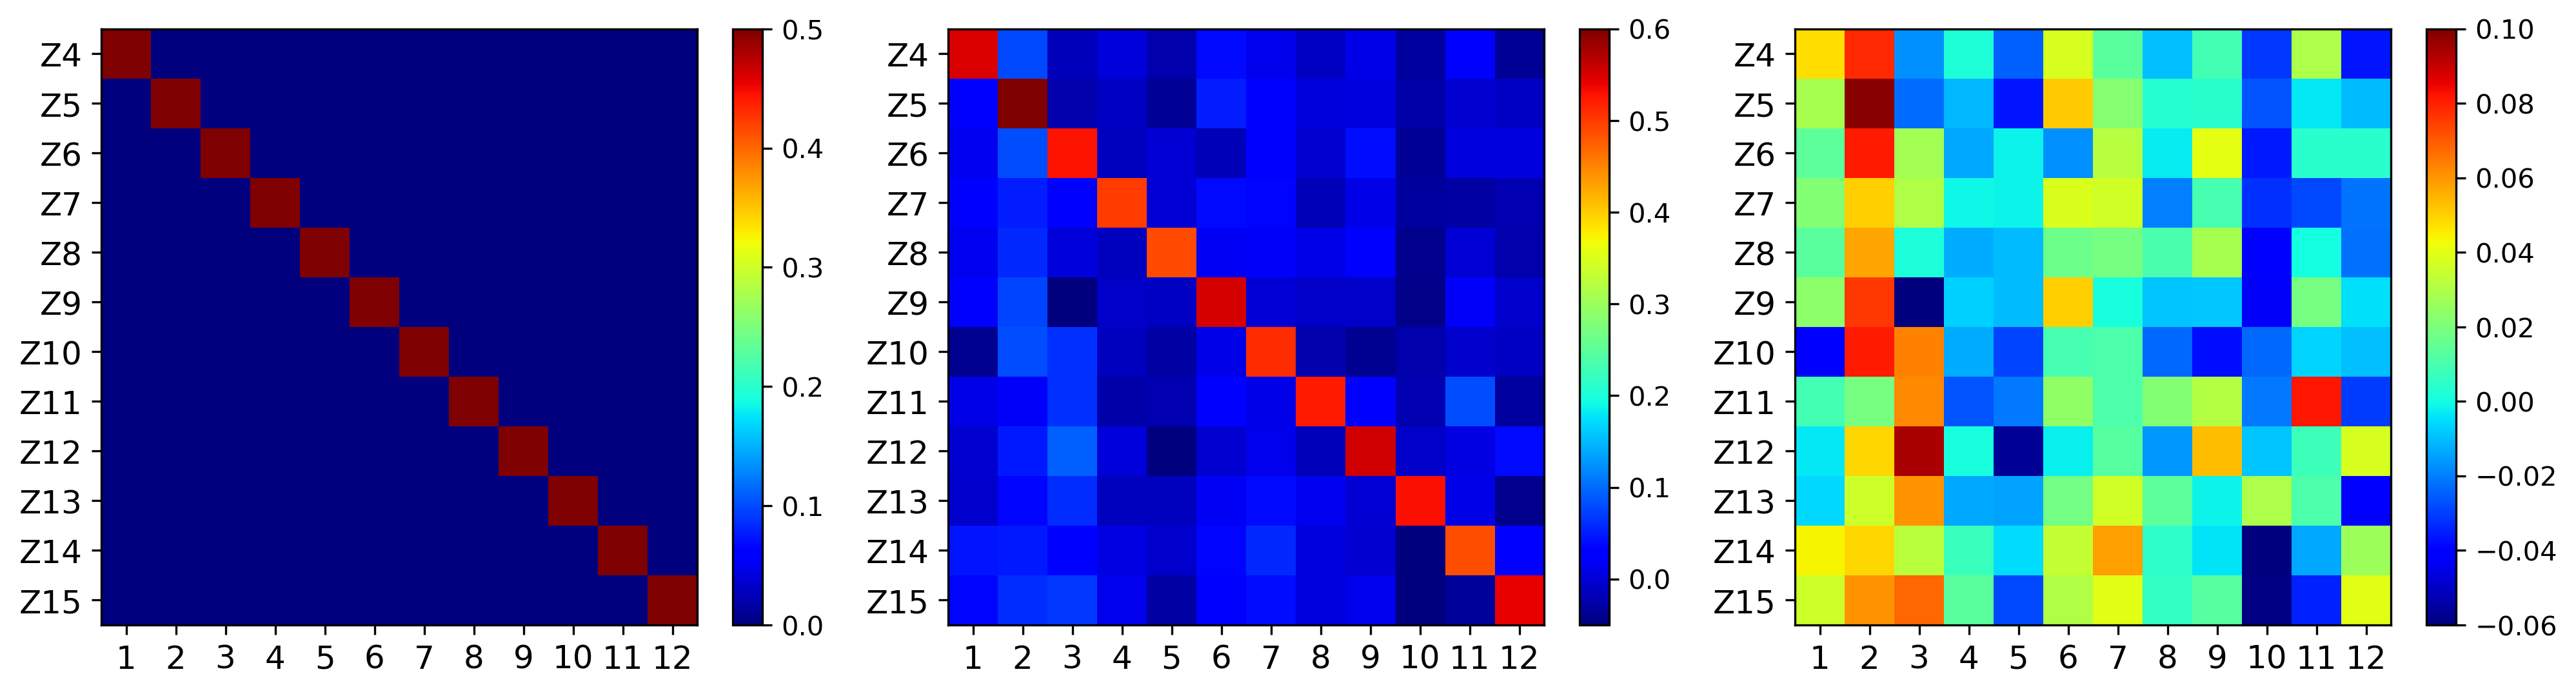

In [11]:
fig, ax = plt.subplots (1,3, figsize = (16,4), dpi = 300)



x_labels = [str(i) for i in range(1, 13)]  # Numbers 1 to 12 for x-axis
y_labels = [f'Z{i}' for i in range(4, 16)]  # Z1 to Z12 for y-axis




im1 = ax[0].imshow(target, cmap ='jet')
# ax[0].axis('off')
plt.colorbar(im1, ax = ax[0],fraction = 0.045)
ax[0].set_xticks(np.arange(12))  
ax[0].set_xticklabels(x_labels, fontsize=12)  
ax[0].set_yticks(np.arange(12))  
ax[0].set_yticklabels(y_labels, fontsize=12) 



im2 = ax[1].imshow(predicted_12, cmap ='jet', vmin = -0.05, vmax = 0.6)
# ax[1].axis('off')
plt.colorbar(im2, ax = ax[1],fraction = 0.045)
ax[1].set_xticks(np.arange(12))  
ax[1].set_xticklabels(x_labels, fontsize=12)  
ax[1].set_yticks(np.arange(12))  
ax[1].set_yticklabels(y_labels, fontsize=12) 


im3 = ax[2].imshow(predicted_12 - target, cmap ='jet', vmin = -0.06, vmax = 0.1)
# ax[2].axis('off')
plt.colorbar(im3, ax = ax[2],fraction = 0.045)
ax[2].set_xticks(np.arange(12))  
ax[2].set_xticklabels(x_labels, fontsize=12)  
ax[2].set_yticks(np.arange(12))  
ax[2].set_yticklabels(y_labels, fontsize=12) 

In [12]:
true_phases = []
predicted_phases = []

for i in (range(number_of_data)):
# Compute the weighted sum of the 15 aberration images for this data point
    phase_true = np.sum([target[j][i] * aberrations[j] for j in range(12)], axis = 0)
    phase_predicted = np.sum([predicted[j][i] * aberrations[j] for j in range(12)], axis = 0)

    true_phases.append(phase_true)
    predicted_phases.append(phase_predicted)

In [13]:
x = np.linspace(-1,1, true_phases[0].shape[0])
X,Y = np.meshgrid(x,x)

circ = np.sqrt(X*X+Y*Y)<=1

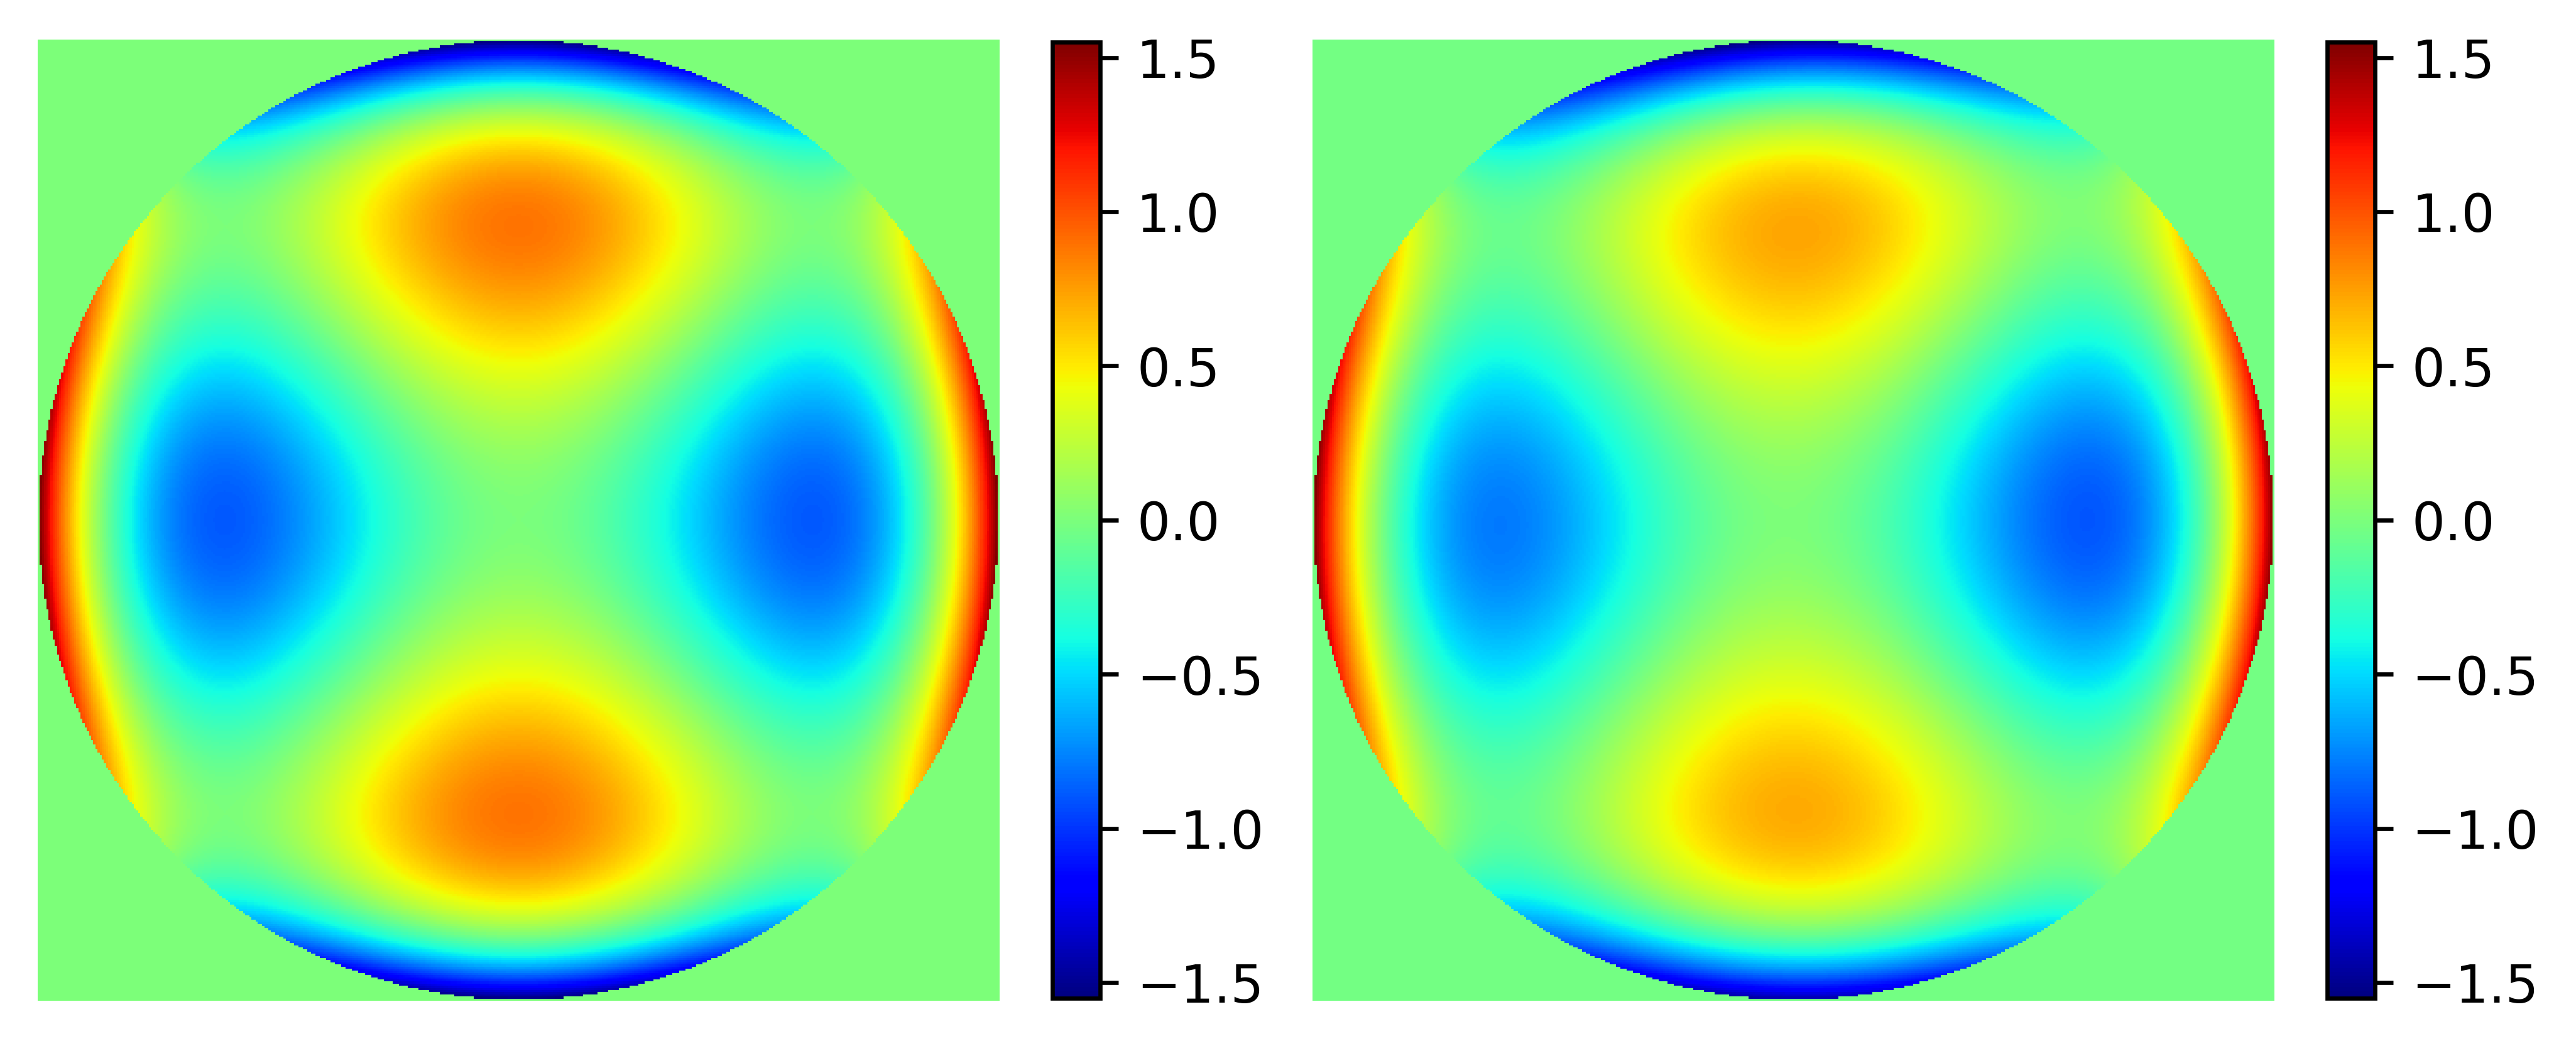

In [14]:
num = 8
fig, ax = plt.subplots (1,2, figsize = (8,4), dpi = 600)


true_image = true_phases[num]*circ
vmin, vmax = true_image.min(), true_image.max()

predicted_image = predicted_phases[num]*circ

predicted_image= (predicted_image - predicted_image.min()) / (predicted_image.max() - predicted_image.min())  
predicted_image = predicted_image * (vmax - vmin) + vmin 
# predicted_image


im1 = ax[0].imshow(true_image, cmap ='jet')
ax[0].axis('off')
plt.colorbar(im1, ax = ax[0],fraction = 0.045)

im2 = ax[1].imshow(predicted_image, cmap ='jet')
ax[1].axis('off')
plt.colorbar(im2, ax = ax[1],fraction = 0.045)

In [15]:
bar_true = [target[i,i] for i in range(12)]
bar_predict = [predicted[i,i] for i in range(12)]

(0.0, 0.8)

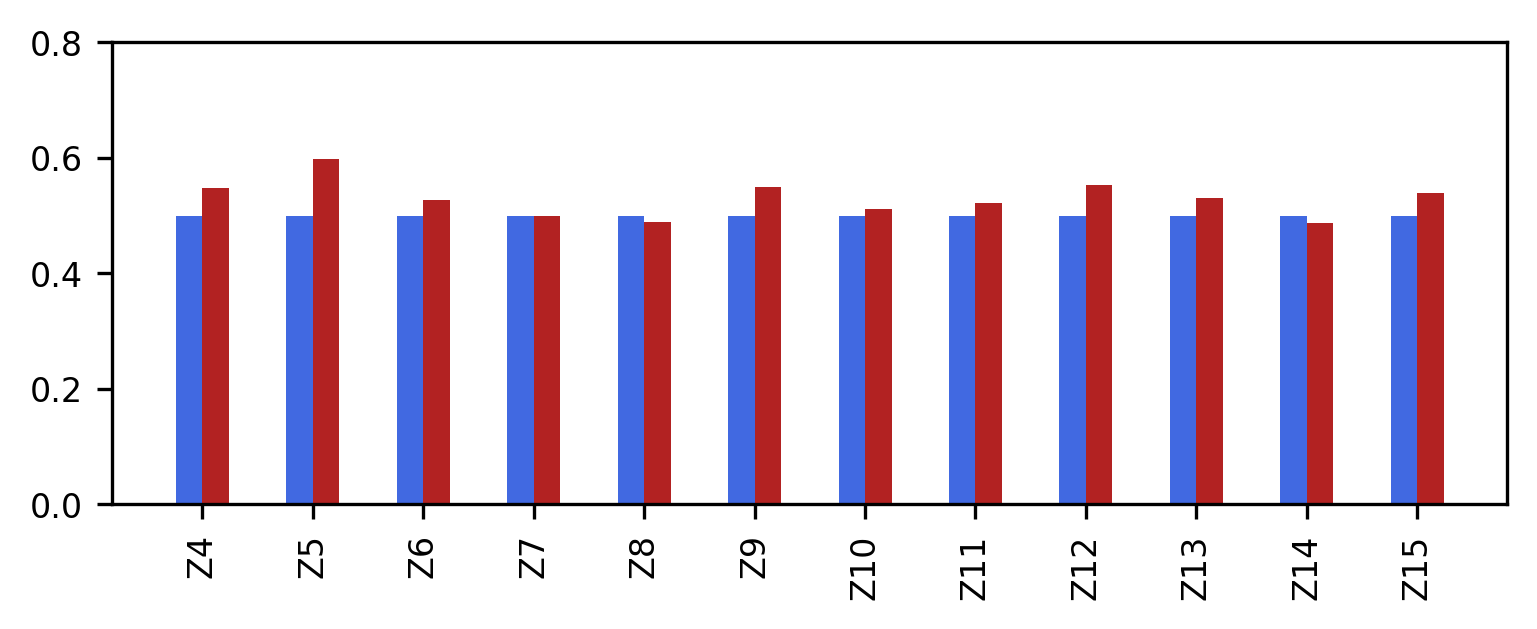

In [16]:
plt.figure(figsize=(6,2), dpi = 300)
plt.bar(np.arange(len(bar_true))-0.12,bar_true,label='applied', width = 0.24, color = 'royalblue')
plt.bar(np.arange(len(bar_predict))+0.12,bar_predict, label='estimated' , width = 0.24, color = 'firebrick')

xticks = np.arange(len(target[num]))
xlabels = [f'Z{i+4}' for i in xticks]  # Create labels Z4 to Z40
plt.xticks(xticks, xlabels, rotation = 90, fontsize = 8)  # Set custom x-ticks and labels
plt.yticks(fontsize=8) 
plt.ylim(0,0.8)

# plt.xlabel('Zernike mode')
# plt.ylabel('Coefficient (strength)')
# plt.legend()

In [17]:
target = np.load('datasets/testing_50.npy')
predicted = np.load('datasets/testing_50_prediction.npy')

In [18]:
number_of_data = target.shape[0]

In [19]:
true_phases = []
predicted_phases = []

for i in (range(number_of_data)):
# Compute the weighted sum of the 15 aberration images for this data point
    phase_true = np.sum(target[i, :, np.newaxis, np.newaxis] * np.array(aberrations), axis=0)
    phase_predicted = np.sum(predicted[i, :, np.newaxis, np.newaxis] * np.array(aberrations), axis=0)

    true_phases.append(phase_true)
    predicted_phases.append(phase_predicted)


In [20]:
x = np.linspace(-1,1, true_phases[0].shape[0])
X,Y = np.meshgrid(x,x)

circ = np.sqrt(X*X+Y*Y)<=1

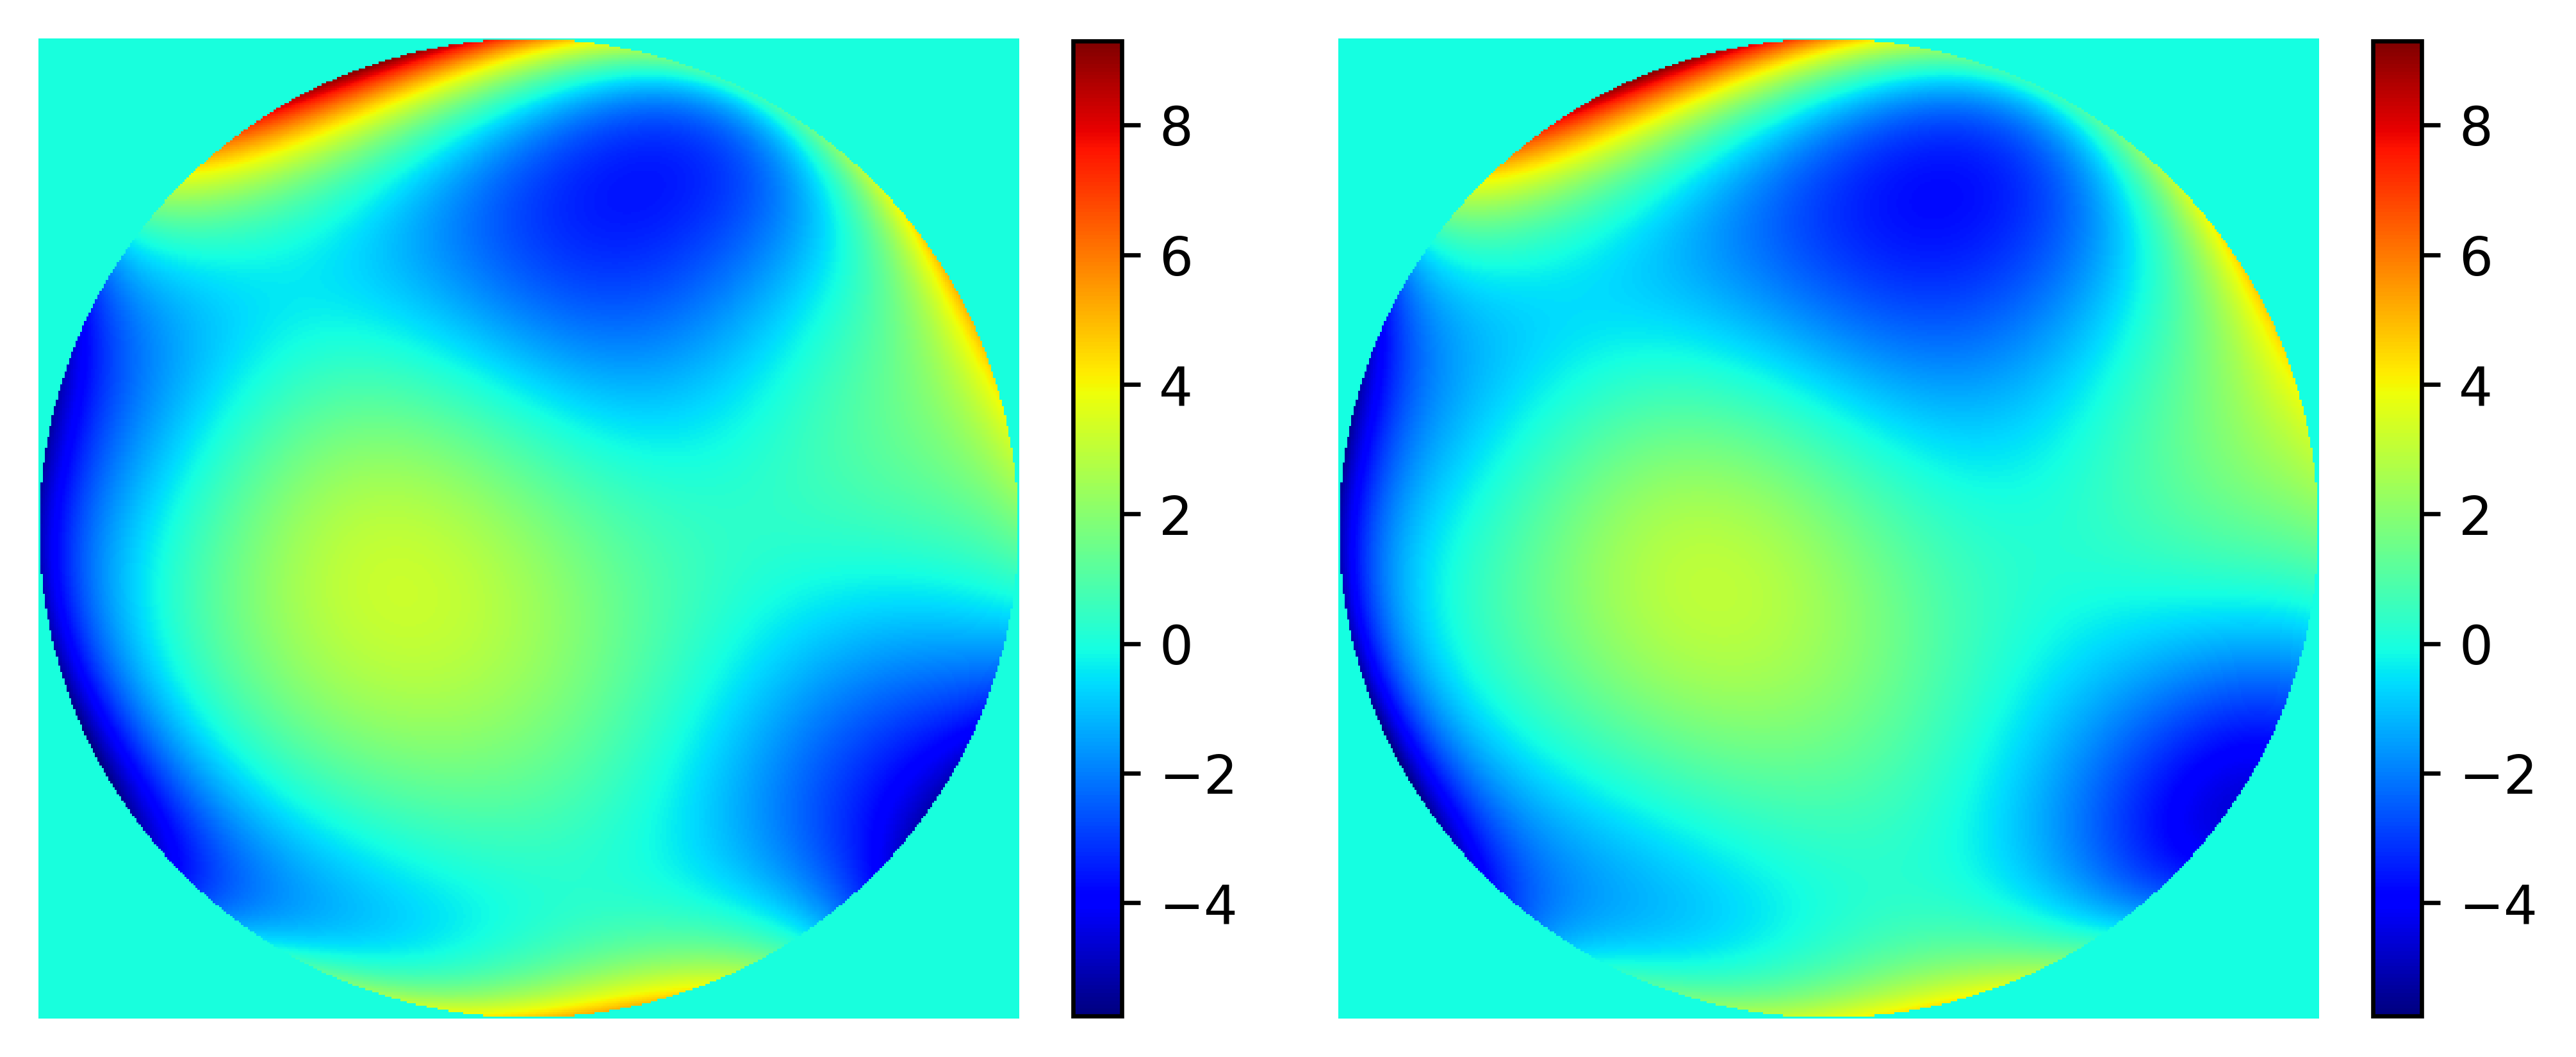

In [21]:
num = 12
fig, ax = plt.subplots (1,2, figsize = (8,4), dpi = 600)


true_image = true_phases[num]*circ
vmin, vmax = true_image.min(), true_image.max()

predicted_image = predicted_phases[num]*circ

predicted_image= (predicted_image - predicted_image.min()) / (predicted_image.max() - predicted_image.min())  
predicted_image = predicted_image * (vmax - vmin) + vmin 
# predicted_image


im1 = ax[0].imshow(true_image, cmap ='jet')
ax[0].axis('off')
plt.colorbar(im1, ax = ax[0],fraction = 0.045)

im2 = ax[1].imshow(predicted_image, cmap ='jet')
ax[1].axis('off')
plt.colorbar(im2, ax = ax[1],fraction = 0.045)

In [22]:
def RMSE(target,predict):
  MSE = np.square(np.subtract(target,predict)).mean()
  RMSE = np.sqrt(MSE)
  return RMSE

In [23]:
rmse_values = []
for i in range(target.shape[0]):
  rmse = RMSE(target[i], predicted[i])
  rmse_values.append(rmse)

(0.0, 0.1)

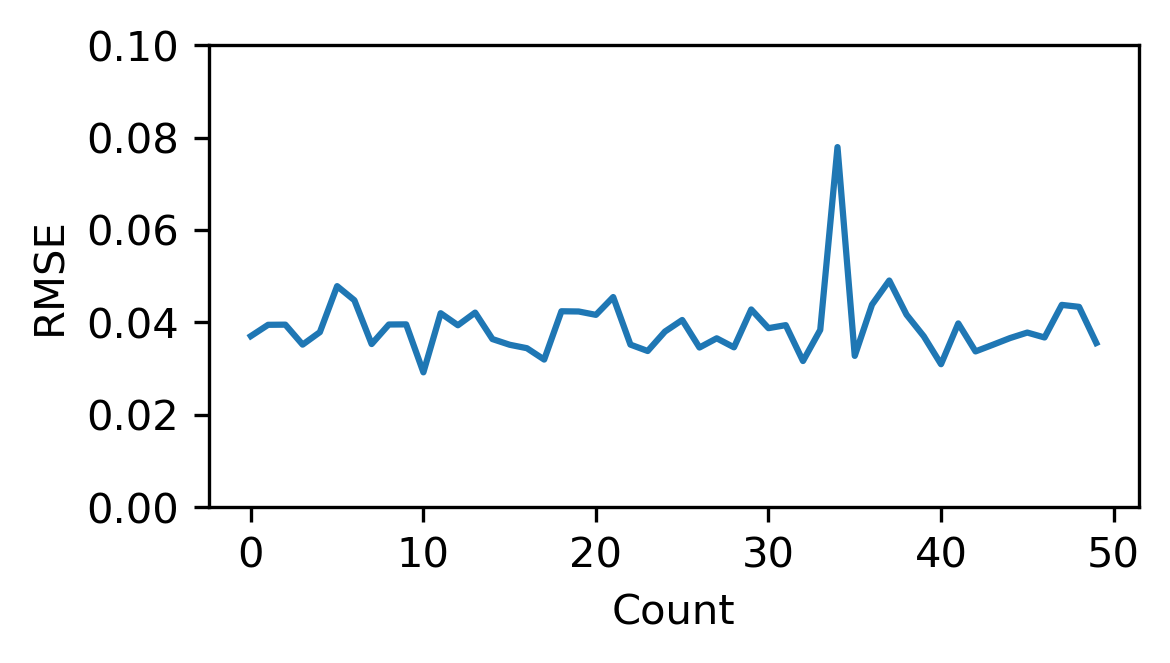

In [24]:
plt.figure(figsize=(4,2), dpi = 300)
plt.plot(rmse_values)
plt.xlabel('Count')
plt.ylabel('RMSE')
plt.ylim(0, 0.1)

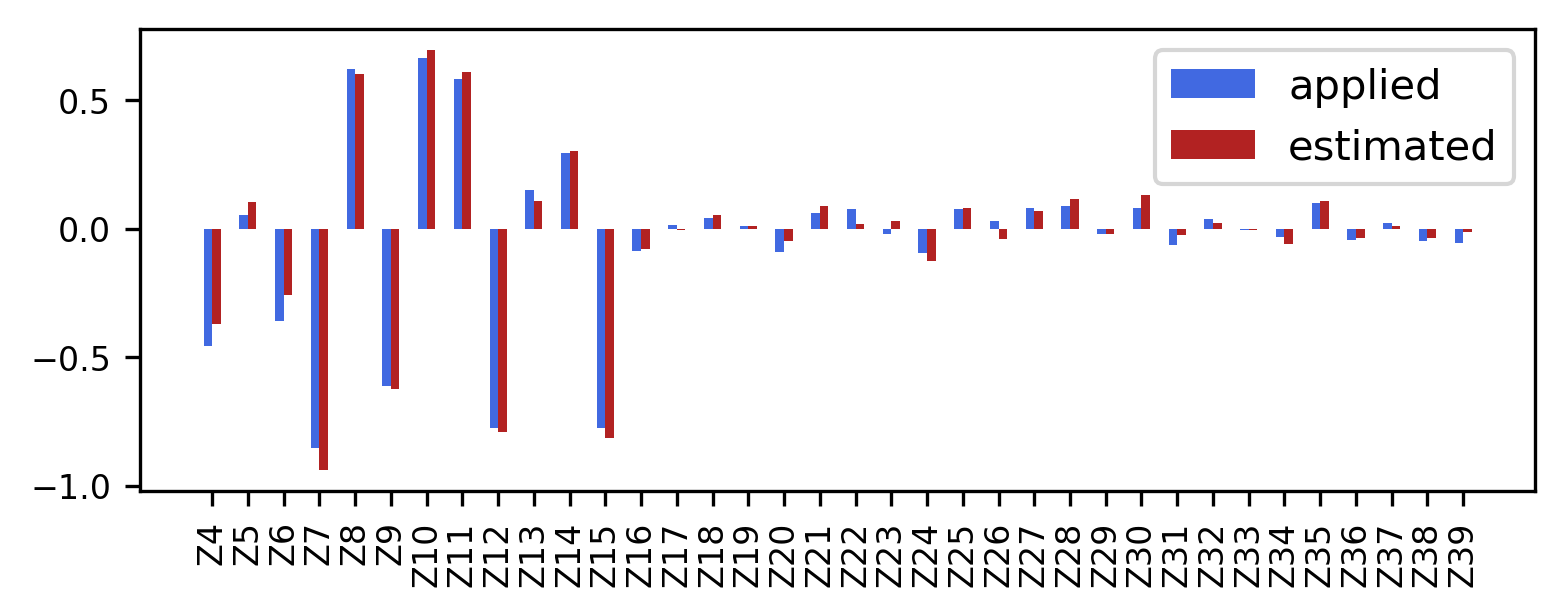

In [25]:
plt.figure(figsize=(6,2), dpi = 300)
plt.bar(np.arange(len(target[num]))-0.12,target[num],label='applied', width = 0.24, color = 'royalblue')
plt.bar(np.arange(len(predicted[num]))+0.12,predicted[num], label='estimated' , width = 0.24, color = 'firebrick')

xticks = np.arange(len(target[num]))
xlabels = [f'Z{i+4}' for i in xticks]  # Create labels Z4 to Z40
plt.xticks(xticks, xlabels, rotation = 90, fontsize = 8)  # Set custom x-ticks and labels
plt.yticks(fontsize=8) 

# plt.xlabel('Zernike mode')
# plt.ylabel('Coefficient (strength)')
plt.legend()